# 🧑🏻‍💼 2003037
> 👨🏻‍💻 [README.md](https://github.com/mehedi37/LAB/blob/main/2-2/numerical/README.md)

# 📦 Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, simplify, together, Poly
from scipy.optimize import curve_fit
import math

# 🧬 Generates the interpolation polynomial `f(x)` Dynamically

In [30]:
# This function will generate the difference table for the given data.
def difference_table(population):
    delta = []
    delta.append(population)
    for i in range(len(population)-1):
        delta.append([])
        for j in range(len(population)-i-1):
            delta[i+1].append(delta[i][j+1] - delta[i][j])
    # print("Delta table:")
    # print(delta)
    return delta


# This function finds the polynomial of the given data using Newton's Forward Interpolation method.
def find_the_polynomial(delta, years, population):
    '''
        Yn(X) = Y0 + p * delta1 + p * (p-1) * delta2 / 2! + p * (p-1) * (p-2) * delta3 / 3! + ...
    '''

    x = symbols('x')
    p = (x - years[0]) / (years[1] - years[0])
    eqn = population[0]

    static_p = p
    fact = 1
    for i in range(1, len(delta)):
        fact *= i
        term = p * delta[i][0] / fact
        eqn += term
        p *= (static_p - i)

    # Simplify the expression
    eqn = simplify(eqn)
    derivative = diff(eqn, x)
    print(f"\n\nEquation: {eqn}\n\nDerivative: {derivative}\n\n")

    return [eqn, derivative]

# 🚀 Newton Interpolation (*Forward*)



1.   `eqn` = The general intigration polynomial
2.   `target_year` = x0

> $p = \frac{X_1 - X_0}{h}$

> $Y_n(X) = Y_0 + p\cdot\Delta y_0 + \frac{p\cdot(p-1)\cdot\Delta^2 y_0}{2!} + \frac{p\cdot(p-1)\cdot(p-2)\cdot\Delta^3 y_0}{3!} + ..$



In [31]:
def NewtonInterpolation(eqn, target_year):
    '''
    we know,
        X = X0 + p * h
        p = (x - X0) / h

    So,
        Yn(X) = Y0 + p * delta1 + p * (p-1) * delta2 / 2! + p * (p-1) * (p-2) * delta3 / 3! + ...
    '''
    return func(eqn, target_year)

# ⚡️ Newton Raphson
> $X_1 = X_0 - \frac{f(x)}{f'(x)}$

In [32]:
# It solves the equation for the given value of x.
def func(eqn, x):
    solution = round(eqn.subs('x', x), 6)       # the more the decimal places, the more accurate the result
    # print(f"Solution for x = {x}: {solution}")
    return solution

#  I will be given target population and I have to find the year
def newton_raphson(eqn, derivative, pop, initial_guess, accuracy = 0.001, max_iter=100):
    x = initial_guess
    Xn = x - (func(eqn, x) / func(derivative, x))
    while abs(Xn - x) > accuracy and max_iter > 0:
        max_iter = max_iter-1
        x = Xn
        if (func(derivative, x) == 0):
            print("Error! - derivative zero for x = ", x)
            return None
        Xn = x - (func(eqn, x) / func(derivative, x))
    return Xn

# 📈Curve Fitting

In [33]:
def curveGeneralEqn(x, *coefficients):
    # Assuming coefficients are in the form [a0, a1, a2, ...]
    return sum(a * x**i for i, a in enumerate(coefficients))

def curve_fitting(eqn, years, population):
    '''
    Our target is to take the N.Interpolation General Eqn and make a new eqn with unknown coefficients.
    so,
        from 1250*x**(5/3) - 4170000*x**4 + 16693341250*x**3 - 33413380800000*x**2 + 100320284607985000*x/3 - 13386729871852880000
        we get a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5
        then we will solve this equation for the given values of x and y.
        Find the values of a0, a1, a2, a3, a4, a5.
        Then we will substitute the values of a0, a1, a2, a3, a4, a5 in the general equation.
        Then we will get the curve fitting equation.
        We will use this equation to find the population for the next 10 years.
    '''
    x = symbols('x')
    # Convert expression to a rational function
    rational_expression = together(eqn)
    # taking all the coefficients of the equation
    coefficients = Poly(rational_expression, x).all_coeffs()
    # Determine the order of the equation
    order = len(coefficients) - 1
    initial_guess = np.ones(order)
    params, _ = curve_fit(curveGeneralEqn, years, population, p0=initial_guess)
    return params

# 📊 Plotting



Equation: 1250*x**5/3 - 4170000*x**4 + 16693341250*x**3 - 33413380800000*x**2 + 100320284607985000*x/3 - 13386729871852880000

Derivative: 6250*x**4/3 - 16680000*x**3 + 50080023750*x**2 - 66826761600000*x + 100320284607985000/3




C:\Users\mjmeh\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



Newton Interpolation: 
Population in 2005  :  151470000
Population in 2006  :  154920000
Population in 2007  :  159100000
Population in 2008  :  164600000
Population in 2009  :  172280000
Population in 2010  :  183320000
Population in 2011  :  199270000
Population in 2012  :  222100000
Population in 2013  :  254250000
Population in 2014  :  298680000

Newton Raphson: 
In 2005 (2005) Year Population: 151470000
In 2005.808500898 (2006) Year Population: 154920000
In 2007.266566409 (2007) Year Population: 159100000
In 2008.122099910 (2008) Year Population: 164600000
In 2008.816971668 (2009) Year Population: 172280000
In 2009.972518611 (2010) Year Population: 183320000
In 2010.903029100 (2011) Year Population: 199270000
In 2012.012019198 (2012) Year Population: 222100000
In 2012.992576885 (2013) Year Population: 254250000
In 2013.988075424 (2014) Year Population: 298680000

Curve Fitting: 
Population in 2005  :  151377555.49118042
Population in 2006  :  154450663.64761353
Population in 200

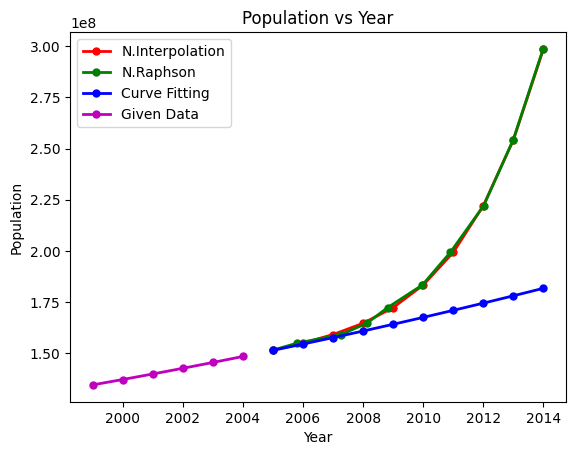

In [34]:
if __name__ == "__main__":
    # data = pd.read_csv('c:\\Users\\mjmeh\\Documents\\Github\\LAB\\2-2\\numerical\\data.csv')
    # url = 'https://raw.githubusercontent.com/mehedi37/LAB/main/2-2/numerical/data.csv'
    url = 'https://raw.githubusercontent.com/mehedi37/LAB/main/2-2/numerical/data.csv?token=GHSAT0AAAAAACHBSKUMDOGALZZTTWYEFC7IZNUYWFQ'
    data = pd.read_csv(url)

    years = data[data.columns[0]].tolist()
    population = data[data.columns[1]].tolist()

    last_year = int(data.iloc[-1, 0])

    # Next 10 years for prediction
    target_year_values = [last_year + i for i in range(1, 11)]

    delta = difference_table(population)
    eqn, derivative = find_the_polynomial(delta, years, population)
    # print(eqn - symbols(str(134480000)))      # Population(t) - target_population = 0

    # curve fitting parameters
    curveParams = curve_fitting(eqn, years, population)

    # Calculate populations for Newton Interpolation and Curve Fitting
    target_population_newton = [NewtonInterpolation(eqn, year) for year in target_year_values]
    target_years_newton_raphson = [newton_raphson(eqn - pop, derivative, pop, last_year + 1) for pop in target_population_newton]
    target_population_curve_fit = [curveGeneralEqn(year, *curveParams) for year in target_year_values]

    print("\nNewton Interpolation: ")
    for year, pop in zip(target_year_values, target_population_newton):     # makes a dictionary
        print("Population in", year, " : ", pop)

    print("\nNewton Raphson: ")
    for year, pop in zip(target_years_newton_raphson, target_population_newton):
        print(f"In {year} ({round(year)}) Year Population: {pop}")

    print("\nCurve Fitting: ")
    for year, pop in zip(target_year_values, target_population_curve_fit):
        print("Population in", year, " : ", pop)


    plt.rcParams.update({
        'lines.linewidth': 2,
        'lines.markersize': 5
    })

    plt.plot(target_year_values, target_population_newton, 'ro-', label='N.Interpolation')
    plt.plot(target_years_newton_raphson, target_population_newton, 'go-', label='N.Raphson')
    plt.plot(target_year_values, target_population_curve_fit, 'bo-', label='Curve Fitting')
    plt.plot(years, population, 'mo-', label='Given Data')

    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Population vs Year')
    plt.legend()
    plt.show()



*  
*   
*
*

For Better View Visit :

>


🔗 [README.md](https://github.com/mehedi37/LAB/blob/main/2-2/numerical/README.md)

---


# Population Prediction and Curve Fitting

![Plot Result](https://github.com/mehedi37/LAB/assets/41261534/aa42407e-79d1-4614-a6c7-a16089b5c2f0)



## Overview
> [!NOTE]
> This Python script uses `Newton's Forward Interpolation`, `Newton Raphson` root finding and `Curve Fitting` techniques to predict population growth over the `next 10 years`. It reads population data from a [CSV file](https://raw.githubusercontent.com/mehedi37/LAB/main/2-2/numerical/data.csv) and performs analysis using symbolic mathematics and numerical optimization.

# Detailed Process
![Total Process in the code](https://github.com/mehedi37/LAB/assets/41261534/0d9ee6c4-6fb4-4416-87a9-4b596a2a5744)


## Prerequisites
> [!CAUTION]
> Make sure you have the following libraries installed:
- `pandas`
- `numpy`
- `matplotlib`
- `scipy`
- `sympy`

You can install them using:
```python
pip install pandas numpy matplotlib scipy sympy
```